--- ABGABE PROGRAMMENTWURF DIGITALE BILDVERARBEITUNG von Paul Straßburger (4834384) ---

-- SETUP --

In [6]:
pip install matplotlib

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import checker
import generator

from IPython.display import display, clear_output
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import importlib
importlib.reload(checker)
importlib.reload(generator)

<module 'generator' from 'C:\\Users\\pauls\\Bildverarbeitung\\generator.py'>

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf        
print('Tensorflow version:', tf.__version__, '(Expected 2.7.0)')

Tensorflow version: 2.14.0 (Expected 2.7.0)


-- DATEN LADEN --

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

 Plot of the first 9 samples in the MNIST training set


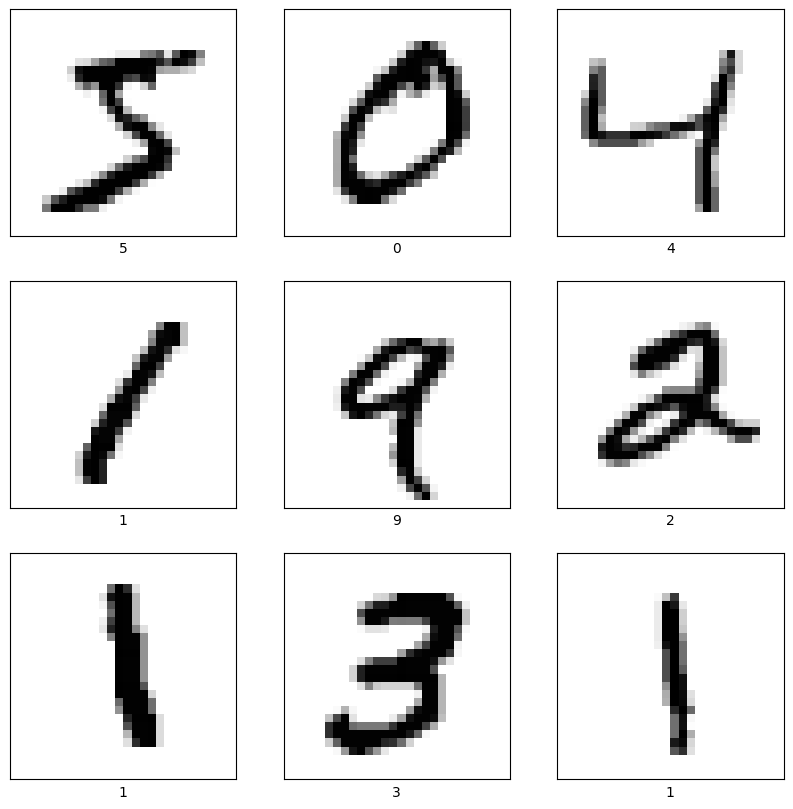

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

print('\n Plot of the first 9 samples in the MNIST training set')
numbers_to_display = 9
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
-- DATEN ANPASSEN --

In [10]:
x_train_normalized = x_train/255 
x_test_normalized = x_test/255 

x_train = x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)

-- DEFINITION MODELL ARCHITEKTUR (PIXEL) --

In [13]:
pixel = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, kernel_regularizer = tf.keras.regularizers.l2(0.07), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.GaussianNoise(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

pixel.summary()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

sampleID = 100
loss_fn(y_train[:1], pixel(x_train[sampleID-1:sampleID]).numpy()).numpy()

pixel.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        1

-- MODELL TRAINIEREN --

In [20]:
import datetime
import os

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

pixel.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=516,
    shuffle = True,
    validation_data=(x_test, y_test),
)

Epoch 1/30
117/117 [==============================] - 51s 433ms/step - loss: 0.1262 - accuracy: 0.9813 - val_loss: 0.1111 - val_accuracy: 0.9847
Epoch 2/30
117/117 [==============================] - 51s 437ms/step - loss: 0.1195 - accuracy: 0.9818 - val_loss: 0.1210 - val_accuracy: 0.9800
Epoch 3/30
117/117 [==============================] - 52s 441ms/step - loss: 0.1296 - accuracy: 0.9800 - val_loss: 0.0939 - val_accuracy: 0.9897
Epoch 4/30
117/117 [==============================] - 51s 438ms/step - loss: 0.1219 - accuracy: 0.9814 - val_loss: 0.0946 - val_accuracy: 0.9874
Epoch 5/30
117/117 [==============================] - 51s 440ms/step - loss: 0.1196 - accuracy: 0.9819 - val_loss: 0.1019 - val_accuracy: 0.9867
Epoch 6/30
117/117 [==============================] - 51s 439ms/step - loss: 0.1219 - accuracy: 0.9810 - val_loss: 0.1050 - val_accuracy: 0.9878
Epoch 7/30
117/117 [==============================] - 51s 437ms/step - loss: 0.1147 - accuracy: 0.9825 - val_loss: 0.0974 - val_ac

-- MODELL SPEICHERN --

In [21]:
model_name = 'pixel_final.h5'
pixel.save(model_name, save_format='h5')

print('Success! You saved PIXEL as: ', model_name)


C:\Users\pauls\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Success! You saved PIXEL as:  pixel_final.h5


In [ ]:
-- MODELL EVALUIEREN --

In [22]:
model_name = 'pixel_final.h5'
pixel_reloaded = tf.keras.models.load_model(model_name)

predictions = pixel_reloaded.predict([x_test])

predictions = np.argmax(predictions, axis=1)


313/313 [==============================] - 5s 14ms/step


In [23]:
(test_loss, test_acc) = pixel_reloaded.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ",test_acc)

C:\Users\pauls\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 5s 15ms/step - loss: 0.0918 - accuracy: 0.9868
Loss:  0.09180421382188797
Accuracy:  0.9868000149726868


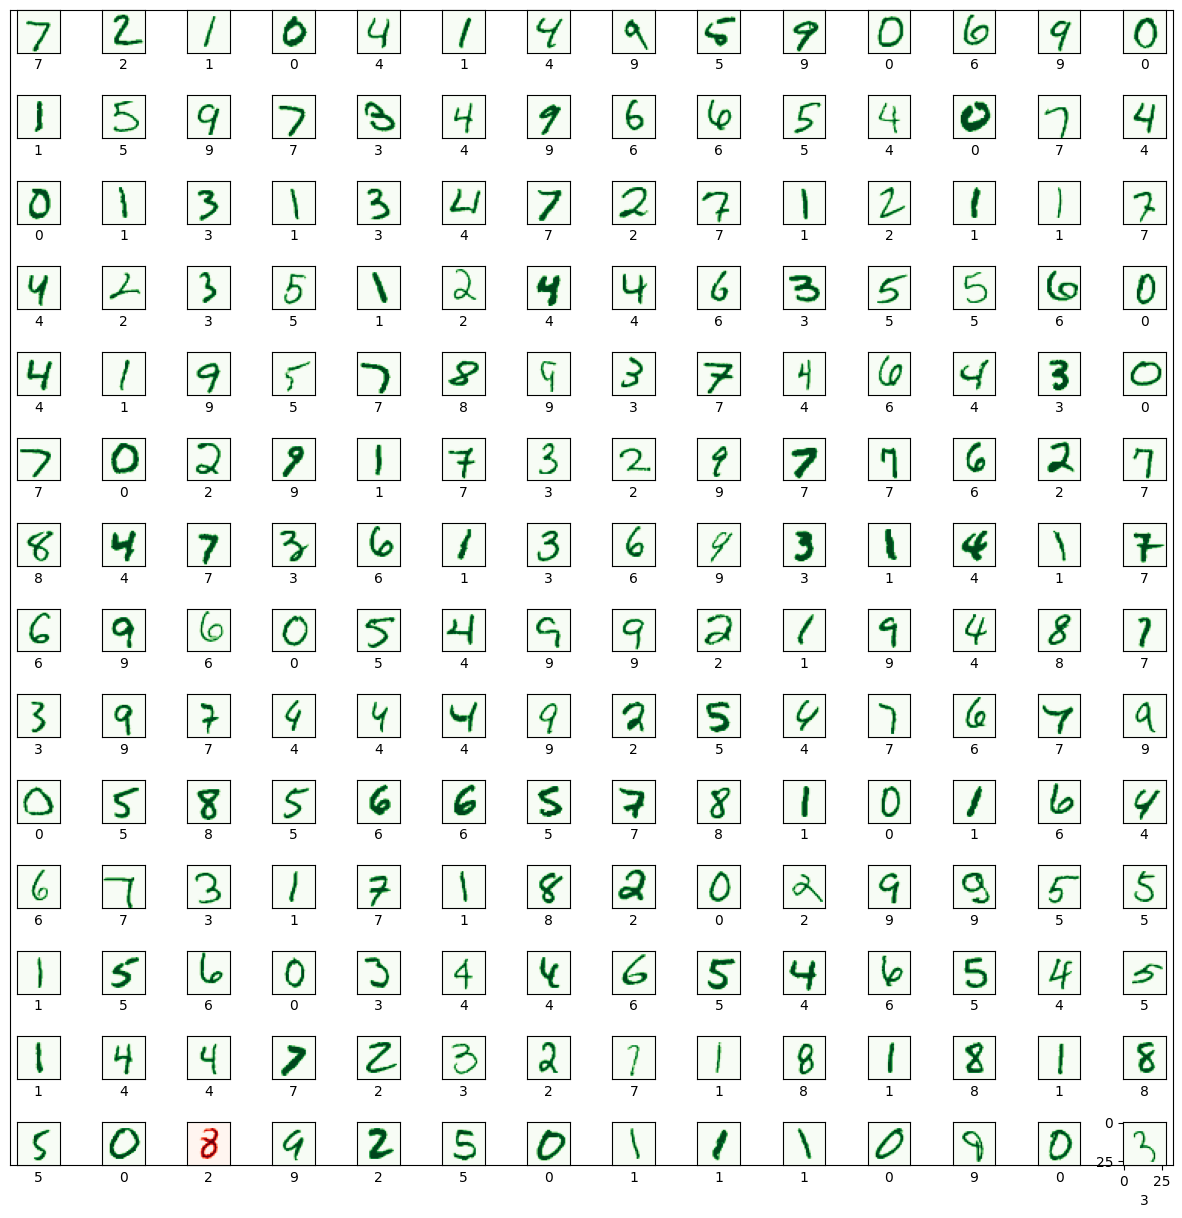

In [24]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

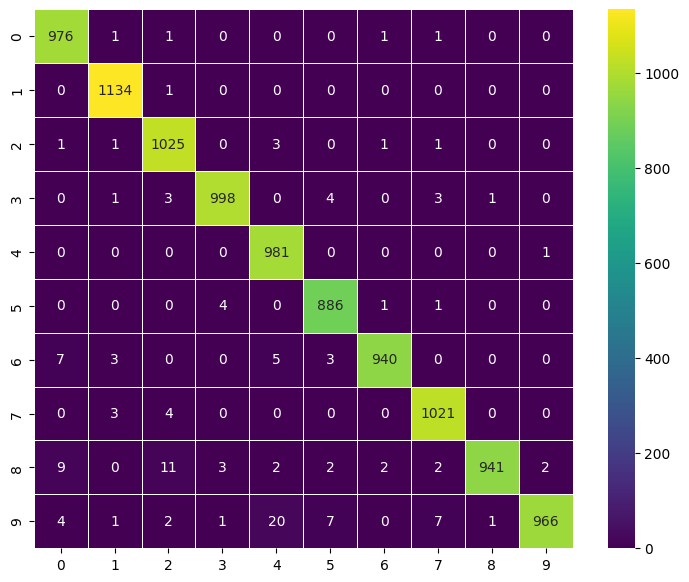

In [25]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()